
## 可视化range_image(128, 2368, 4)

(128, 2368, 4)


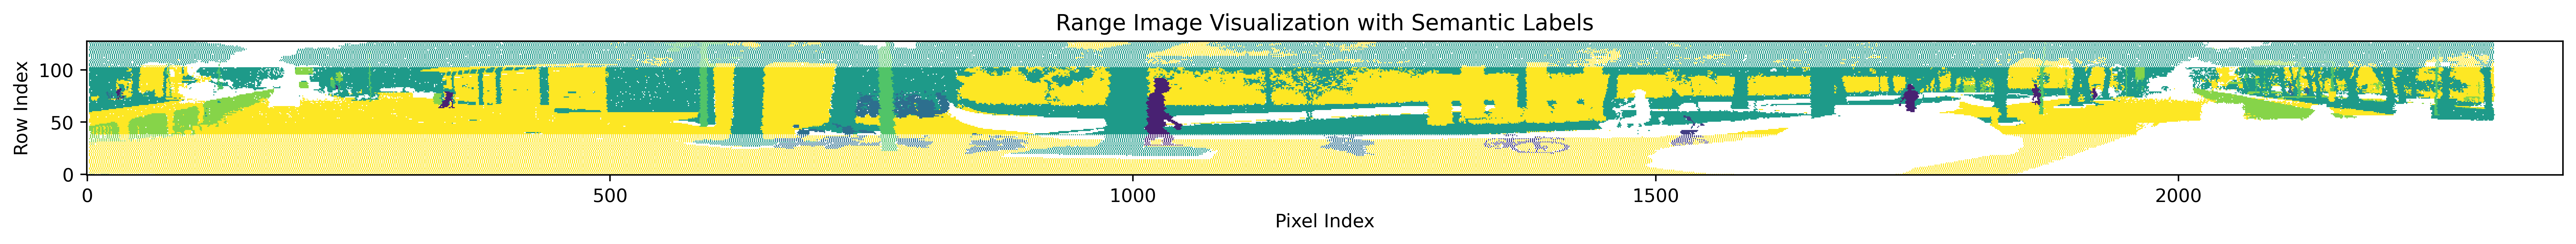

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 假设 range_image 的形状为 (128, 2368, 4)
# 其中前三列是 xyz，最后一列是范围为 1~12 的语义标签
# range_image = np.random.rand(128, 2368, 4)  # 示例数据

# (128, 2368, 4)
# np.save("points.npy", a)
range_image = np.load("./points.npy")  # 示例数据
print(range_image.shape)
# !!!!!!!!看实际情况！！！！！！！！在第一个维度（128 维度）上逆序
range_image = range_image[::-1, :, :]

# 提取语义标签(最后一列)
labels = range_image[:, :, 3].astype(int)  # 形状为 (128, 2368)

# 定义颜色映射
# 假设标签范围为 1~12，为每个标签分配一个颜色
cmap = plt.cm.viridis(np.linspace(0, 1, 12))  # 使用 viridis 颜色映射
cmap = np.vstack([[1, 1, 1, 1], cmap])  # label=0的颜色映射的开头添加白色（RGB: [1, 1, 1, 1]）
cmap = ListedColormap(cmap)  # 将颜色映射转换为 ListedColormap

# 可视化为二维图像
plt.figure(figsize=(24, 16), dpi=500)
# 使用 interpolation='none'：禁用插值，直接显示原始像素。（可选nearest）
plt.imshow(labels, cmap=cmap, interpolation='none', origin='lower')

# 添加颜色条
# cbar = plt.colorbar(ticks=range(1, 13))
# cbar.set_label('Semantic Label')

# 添加标题
plt.title('Range Image Visualization with Semantic Labels')
plt.xlabel('Pixel Index')
plt.ylabel('Row Index')

# 保存图像时设置更高的 DPI
plt.savefig("save/range_image.png", dpi=500)

plt.show()